In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# General Cleaning

In [2]:
data = pd.read_csv("assets/data/data_fe.csv")
data.head()

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
1,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
2,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,not imputed,NaN,1/1/00,27898-27804 US-101,...,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,Unreported,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,not imputed,NaN,1/1/00,600 W Cherry Ln,...,Vehicle,A motorcycle was allegedly being driven errati...,Unreported,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,not imputed,NaN,1/2/00,5700 block Mack Road,...,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000


In [3]:
data.columns = data.columns.str.replace("'"," ")

In [4]:
data = data.rename(columns={'Unique ID':'id',
                            'Subject s name':"name",
                            'Subject s age':"age", 
                            'Subject s race':"race",
                            'Subject s gender':"sex",
                            "Date (Year)": "year",
                           'Subject s race with imputations':'race_imputations',
        'Imputation probability':'imputation_probability', 'URL of image of deceased':'url_image',
       'Date of injury resulting in death (month/day/year)':'date_injury',
       'Location of injury (address)':'address_injury', 'Location of death (city)':'city_death',
       'Location of death (state)':'state_death', 'Location of death (zip code)':"zip_death",
       'Location of death (county)':'county_death', 'Full Address':'full_address', 
       'Agency responsible for death':'agency_responsible_death', 'Cause of death':'cause_death',
       'A brief description of the circumstances surrounding the death':'circumstances_death',
       'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS':'dispositions_exclusions',
       'Link to news article or photo of official document':'links_news',
       'Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS':'symptoms_mental_illness',
       'Date&Description':'date_descr'
                           })
data.head()

,id,name,age,sex,race,race_imputations,imputation_probability,url_image,date_injury,address_injury,...,cause_death,circumstances_death,dispositions_exclusions,links_news,symptoms_mental_illness,Video,date_descr,Unique ID formula,Unique identifier (redundant),year
0,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
1,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
2,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,not imputed,NaN,1/1/00,27898-27804 US-101,...,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,Unreported,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,not imputed,NaN,1/1/00,600 W Cherry Ln,...,Vehicle,A motorcycle was allegedly being driven errati...,Unreported,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,not imputed,NaN,1/2/00,5700 block Mack Road,...,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000


In [5]:
data.drop(['dispositions_exclusions','symptoms_mental_illness','Video',
           'Unique ID formula', 'Unique identifier (redundant)'], axis=1)

,id,name,age,sex,race,race_imputations,imputation_probability,url_image,date_injury,address_injury,...,county_death,full_address,Latitude,Longitude,agency_responsible_death,cause_death,circumstances_death,links_news,date_descr,year
0,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Wayne,Davison Freeway Detroit MI 48203 Wayne,42.404526,-83.092274,NaN,Vehicle,Two Detroit men killed when their car crashed ...,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,1/1/2000: Two Detroit men killed when their ca...,2000
1,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Wayne,Davison Freeway Detroit MI 48203 Wayne,42.404526,-83.092274,NaN,Vehicle,Two Detroit men killed when their car crashed ...,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,1/1/2000: Two Detroit men killed when their ca...,2000
2,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,not imputed,NaN,1/1/00,27898-27804 US-101,...,Mendocino,27898-27804 US-101 Willits CA 95490 Mendocino,39.470883,-123.361751,Mendocino County Sheriff's Office,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,https://drive.google.com/file/d/10DisrV8K5ReP1...,1/1/2000: Samuel Knapp was allegedly driving a...,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,not imputed,NaN,1/1/00,600 W Cherry Ln,...,Eddy,600 W Cherry Ln Carlsbad NM 88220 Eddy,32.450080,-104.237643,Eddy County Sheriff's Office,Vehicle,A motorcycle was allegedly being driven errati...,https://drive.google.com/file/d/1qAEefRjX_aTtC...,1/1/2000: A motorcycle was allegedly being dri...,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,not imputed,NaN,1/2/00,5700 block Mack Road,...,Sacramento,5700 block Mack Road Sacramento CA 95823 Sacra...,38.473949,-121.433776,Sacramento Police Department,Vehicle,LaTanya Janelle McCoy's car was struck from be...,http://www.recordnet.com/article/20000110/A_NE...,1/2/2000: LaTanya Janelle McCoy's car was stru...,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28220,28211.0,"Robinson ""DJ Styles"" Lazard",NaN,Male,African-American/Black,African-American/Black,not imputed,https://fatalencounters.org/wp-content/uploads...,6/7/20,NW 135th St & NW 22nd Ave,...,Miami-Dade,NW 135th St & NW 22nd Ave Opa-locka FL 33167 M...,25.897459,-80.235573,Miami-Dade Police Department,Vehicle,Miami-Dade police were chasing a white Dodge C...,https://www.local10.com/news/local/2020/06/08/...,6/7/2020: Miami-Dade police were chasing a whi...,2020
28221,28213.0,Donald L. Hunter,39,Male,Race unspecified,NaN,NaN,NaN,6/7/20,I-49,...,Bates,"38.404612, -94.342638 I-49 Adrian MO 64720 Bates",38.404612,-94.342638,"Bates County Sheriff’s Office, Adrian Police D...",Gunshot,"Bridgett L. Burriss, 40, was abducted and when...",https://www.kmbc.com/article/bates-county-miss...,"6/7/2020: Bridgett L. Burriss, 40, was abducte...",2020
28222,28214.0,Name withheld by police,NaN,Female,Race unspecified,NaN,NaN,NaN,6/7/20,Bell Drive and Afton Way,...,Cobb,Bell Drive and Afton Way Smyrna GA 30080 Cobb,33.888734,-84.479601,Smyrna Police Department,Vehicle,"About 4:40 a.m., Smyrna police officers respon...",https://www.mdjonline.com/news/police-man-flee...,"6/7/2020: About 4:40 a.m., Smyrna police offic...",2020
28223,28215.0,Name withheld by police,81,Male,Race unspecified,NaN,NaN,NaN,6/8/20,900 block N. Tornillo Street,...,Dona Ana,900 block N. Tornillo Street Las Cruces NM 880...,32.316944,-106.774990,Las Cruces Police Department,Gunshot,Officers responded to a report of a man with s...,https://kvia.com/news/crime/2020/06/08/swat-st...,6/8/2020: Officers responded to a report of a ...,2020


In [6]:
# raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
data['date_injury'] = pd.to_datetime(data['date_injury'])
data.head()

,id,name,age,sex,race,race_imputations,imputation_probability,url_image,date_injury,address_injury,...,cause_death,circumstances_death,dispositions_exclusions,links_news,symptoms_mental_illness,Video,date_descr,Unique ID formula,Unique identifier (redundant),year
0,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,not imputed,NaN,2000-01-01,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
1,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,not imputed,NaN,2000-01-01,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
2,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,not imputed,NaN,2000-01-01,27898-27804 US-101,...,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,Unreported,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,not imputed,NaN,2000-01-01,600 W Cherry Ln,...,Vehicle,A motorcycle was allegedly being driven errati...,Unreported,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,not imputed,NaN,2000-01-02,5700 block Mack Road,...,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000


In [7]:
data.year.unique()

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '#REF!', '2009', '2010', '2011', '#VALUE!', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2100'],
      dtype=object)

In [8]:
drop = data.loc[(data['year'] == '#REF!') | (data['year'] == '#VALUE!') | (data['year'] == '2100')]
print(drop.index)
data = data.drop(drop.index)

Int64Index([9298, 13326, 23872, 23885, 23889, 24208, 27768, 28004, 28224], dtype='int64')


In [9]:
data.year.unique()

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [10]:
data.dtypes

id                                      float64
name                                     object
age                                      object
sex                                      object
race                                     object
race_imputations                         object
imputation_probability                   object
url_image                                object
date_injury                      datetime64[ns]
address_injury                           object
city_death                               object
state_death                              object
zip_death                               float64
county_death                             object
full_address                             object
Latitude                                float64
Longitude                               float64
agency_responsible_death                 object
cause_death                              object
circumstances_death                      object
dispositions_exclusions                 

In [11]:
data.to_csv('assets/data/data_fe_cleaned.csv', index=False)

# Analysis by Year

In [12]:
year_groupby = data.groupby(['year'])
year_count = year_groupby['Unique identifier (redundant)'].count().reset_index(name = 'total_killed')
# year_count = year_count.drop([0, 1, 23])
year_count = year_count.reset_index()

In [13]:
year_count = year_count.drop(['index'], axis=1)
year_count

,year,total_killed
0,2000,851
1,2001,923
2,2002,986
3,2003,1052
4,2004,1037
5,2005,1171
6,2006,1269
7,2007,1256
8,2008,1209
9,2009,1257


<BarContainer object of 21 artists>

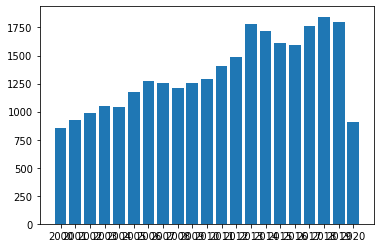

In [14]:
x_axis = year_count['year']
y_axis = year_count['total_killed']
plt.bar(x_axis, y_axis)

In [15]:
blacks = data.loc[data["race"]=="African-American/Black",:]
blacks

,id,name,age,sex,race,race_imputations,imputation_probability,url_image,date_injury,address_injury,...,cause_death,circumstances_death,dispositions_exclusions,links_news,symptoms_mental_illness,Video,date_descr,Unique ID formula,Unique identifier (redundant),year
0,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,not imputed,NaN,2000-01-01,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
1,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,not imputed,NaN,2000-01-01,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,not imputed,NaN,2000-01-02,5700 block Mack Road,...,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000
6,25750.0,Billy Jones,30,Male,African-American/Black,African-American/Black,not imputed,NaN,2000-01-02,Pollock Street,...,Vehicle,Officer Charles Rowe began pursuing Billie Jon...,Unreported,https://docs.google.com/document/d/1G106pI2URB...,No,NaN,1/2/2000: Officer Charles Rowe began pursuing ...,NaN,25750.0,2000
7,25751.0,Terry Rouse,29,Male,African-American/Black,African-American/Black,not imputed,NaN,2000-01-02,Pollock Street,...,Vehicle,Officer Charles Rowe began pursuing Billie Jon...,Unreported,https://docs.google.com/document/d/1G106pI2URB...,No,NaN,1/2/2000: Officer Charles Rowe began pursuing ...,NaN,25751.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28188,28188.0,Alazae Jeffrey,19,Female,African-American/Black,African-American/Black,not imputed,https://fatalencounters.org/wp-content/uploads...,2020-06-02,1466 Alamo Dr,...,Vehicle,"Jaiah Metcalf, 21, and Alazae Jeffrey, 19, wer...",Pending investigation,https://www.mercurynews.com/2020/06/03/two-wom...,No,NaN,"6/2/2020: Jaiah Metcalf, 21, and Alazae Jeffre...",NaN,28188.0,2020
28190,28206.0,Tiffany Alexis Eubanks,33,Female,African-American/Black,African-American/Black,not imputed,NaN,2020-06-02,1300 N 1st St,...,Asphyxiated/Restrained,Tiffany Eubanks reportedly became combative wh...,Pending investigation,https://www.yakimaherald.com/news/local/homele...,Yes,NaN,6/2/2020: Tiffany Eubanks reportedly became co...,NaN,28206.0,2020
28207,28201.0,Kamal Flowers,24,Male,African-American/Black,African-American/Black,not imputed,NaN,2020-06-05,Potter Avenue and Pierce Street,...,Gunshot,Two officers made a traffic stop at 11 p.m. A ...,NaN,https://www.lohud.com/story/news/local/westche...,No,NaN,6/5/2020: Two officers made a traffic stop at ...,NaN,28201.0,2020
28219,28210.0,"Edmon ""DJ Boogie"" McCoy",NaN,Male,African-American/Black,African-American/Black,not imputed,https://fatalencounters.org/wp-content/uploads...,2020-06-07,NW 135th St & NW 22nd Ave,...,Vehicle,Miami-Dade police were chasing a white Dodge C...,Pending investigation,https://www.local10.com/news/local/2020/06/08/...,No,NaN,6/7/2020: Miami-Dade police were chasing a whi...,NaN,28210.0,2020


In [16]:
year_groupby_black = blacks.groupby(['year'])
year_count_black = year_groupby_black['id'].count().reset_index(name = 'killed_black')
year_count_black = year_count_black.drop([0, 1])
year_count_black = year_count_black.reset_index()
year_count_black = year_count_black.drop(['index'], axis=1)
year_count_black

,year,killed_black
0,2002,126
1,2003,158
2,2004,139
3,2005,173
4,2006,211
5,2007,207
6,2008,225
7,2009,262
8,2010,293
9,2011,359


In [17]:
caucasian = data.loc[data["race"]=="European-American/White",:]


In [18]:
year_groupby_white = caucasian.groupby(['year'])
year_count_white = year_groupby_white['id'].count().reset_index(name = 'killed_caucasian')
year_count_white = year_count_white.drop([0, 1])
year_count_white = year_count_white.reset_index()
year_count_white = year_count_white.drop(['index'], axis=1)
year_count_white

,year,killed_caucasian
0,2002,138
1,2003,153
2,2004,173
3,2005,246
4,2006,273
5,2007,297
6,2008,277
7,2009,369
8,2010,446
9,2011,503


In [19]:
# merge total with blacks
merge_table = pd.merge(year_count, year_count_black, on="year", how="outer")
merge_table

,year,total_killed,killed_black
0,2000,851,NaN
1,2001,923,NaN
2,2002,986,126.0
3,2003,1052,158.0
4,2004,1037,139.0
5,2005,1171,173.0
6,2006,1269,211.0
7,2007,1256,207.0
8,2008,1209,225.0
9,2009,1257,262.0


In [20]:
# add % blacks
merge_table["perc_killed_black"] = round((merge_table["killed_black"]/merge_table['total_killed'])*100)
merge_table

,year,total_killed,killed_black,perc_killed_black
0,2000,851,NaN,NaN
1,2001,923,NaN,NaN
2,2002,986,126.0,13.0
3,2003,1052,158.0,15.0
4,2004,1037,139.0,13.0
5,2005,1171,173.0,15.0
6,2006,1269,211.0,17.0
7,2007,1256,207.0,16.0
8,2008,1209,225.0,19.0
9,2009,1257,262.0,21.0


In [21]:
# merge with caucasians
merge_table = pd.merge(merge_table, year_count_white, on="year", how="outer")
# add % caucasians
merge_table["perc_killed_caucasian"] = round((merge_table["killed_caucasian"]/merge_table['total_killed'])*100)
merge_table

,year,total_killed,killed_black,perc_killed_black,killed_caucasian,perc_killed_caucasian
0,2000,851,NaN,NaN,NaN,NaN
1,2001,923,NaN,NaN,NaN,NaN
2,2002,986,126.0,13.0,138.0,14.0
3,2003,1052,158.0,15.0,153.0,15.0
4,2004,1037,139.0,13.0,173.0,17.0
5,2005,1171,173.0,15.0,246.0,21.0
6,2006,1269,211.0,17.0,273.0,22.0
7,2007,1256,207.0,16.0,297.0,24.0
8,2008,1209,225.0,19.0,277.0,23.0
9,2009,1257,262.0,21.0,369.0,29.0


In [22]:
merge_table.to_csv('assets/data/data_fe_race.csv', index=False)

# Analysis by State

In [23]:
state_groupby = data.groupby(['state_death','year'])
state_count = state_groupby['Unique identifier (redundant)'].count().reset_index(name = 'total_killed')
state_count

,state_death,year,total_killed
0,AK,2000,4
1,AK,2001,6
2,AK,2002,9
3,AK,2003,3
4,AK,2004,3
...,...,...,...
1029,WY,2016,3
1030,WY,2017,5
1031,WY,2018,7
1032,WY,2019,3


In [24]:
#blacks by state
state_groupby_black = blacks.groupby(['state_death','year'])
state_count_black = state_groupby_black['id'].count().reset_index(name = 'killed_black')
state_count_black

,state_death,year,killed_black
0,AK,2010,1
1,AK,2012,1
2,AK,2014,1
3,AK,2017,2
4,AK,2018,1
...,...,...,...
728,WV,2016,1
729,WV,2017,1
730,WV,2018,2
731,WV,2019,3


In [25]:
#caucasian killed by state
state_groupby_white = caucasian.groupby(['state_death','year'])
state_count_white = state_groupby_white['id'].count().reset_index(name = 'killed_caucasian')
state_count_white

,state_death,year,killed_caucasian
0,AK,2001,1
1,AK,2003,1
2,AK,2006,2
3,AK,2008,2
4,AK,2009,1
...,...,...,...
914,WY,2016,2
915,WY,2017,3
916,WY,2018,4
917,WY,2019,1


In [26]:
# merge total with blacks
merge_state_table = pd.merge(state_count, state_count_black, on=['state_death', 'year'], how="outer")
merge_state_table

,state_death,year,total_killed,killed_black
0,AK,2000,4,NaN
1,AK,2001,6,NaN
2,AK,2002,9,NaN
3,AK,2003,3,NaN
4,AK,2004,3,NaN
...,...,...,...,...
1029,WY,2016,3,NaN
1030,WY,2017,5,NaN
1031,WY,2018,7,NaN
1032,WY,2019,3,NaN


In [27]:
# add % blacks
merge_state_table["perc_killed_black"] = round((merge_state_table["killed_black"]/merge_state_table['total_killed'])*100)
merge_state_table

,state_death,year,total_killed,killed_black,perc_killed_black
0,AK,2000,4,NaN,NaN
1,AK,2001,6,NaN,NaN
2,AK,2002,9,NaN,NaN
3,AK,2003,3,NaN,NaN
4,AK,2004,3,NaN,NaN
...,...,...,...,...,...
1029,WY,2016,3,NaN,NaN
1030,WY,2017,5,NaN,NaN
1031,WY,2018,7,NaN,NaN
1032,WY,2019,3,NaN,NaN


In [28]:
# merge with caucasians
merge_state_table = pd.merge(merge_state_table, state_count_white, on=['state_death', 'year'], how="outer")
merge_state_table

,state_death,year,total_killed,killed_black,perc_killed_black,killed_caucasian
0,AK,2000,4,NaN,NaN,NaN
1,AK,2001,6,NaN,NaN,1.0
2,AK,2002,9,NaN,NaN,NaN
3,AK,2003,3,NaN,NaN,1.0
4,AK,2004,3,NaN,NaN,NaN
...,...,...,...,...,...,...
1029,WY,2016,3,NaN,NaN,2.0
1030,WY,2017,5,NaN,NaN,3.0
1031,WY,2018,7,NaN,NaN,4.0
1032,WY,2019,3,NaN,NaN,1.0


In [29]:
# add % caucasians
merge_state_table["perc_killed_caucasian"] = round((merge_state_table["killed_caucasian"]/merge_state_table['total_killed'])*100)
merge_state_table


,state_death,year,total_killed,killed_black,perc_killed_black,killed_caucasian,perc_killed_caucasian
0,AK,2000,4,NaN,NaN,NaN,NaN
1,AK,2001,6,NaN,NaN,1.0,17.0
2,AK,2002,9,NaN,NaN,NaN,NaN
3,AK,2003,3,NaN,NaN,1.0,33.0
4,AK,2004,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1029,WY,2016,3,NaN,NaN,2.0,67.0
1030,WY,2017,5,NaN,NaN,3.0,60.0
1031,WY,2018,7,NaN,NaN,4.0,57.0
1032,WY,2019,3,NaN,NaN,1.0,33.0


In [39]:
merge_state_table.to_csv('assets/data/data_fe_state.csv', index=False)

# Graphs

<BarContainer object of 21 artists>

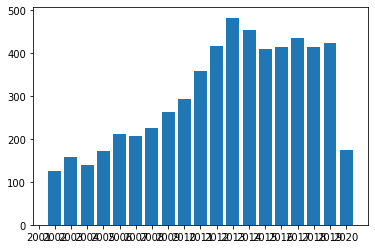

In [30]:
y_axis2=merge_table['killed_black']
plt.bar(x_axis,  y_axis2)

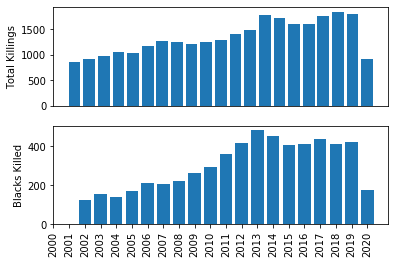

In [31]:
x = range(21)
plt.subplot(2,1,1)
total = plt.bar(x_axis, y_axis)
plt.ylabel('Total Killings')
plt.xticks([],[])

plt.subplot(2,1,2)
black_graph = plt.bar(x_axis, y_axis2)
plt.ylabel('Blacks Killed')
plt.xticks(x_axis, rotation = 'vertical')

plt.show()

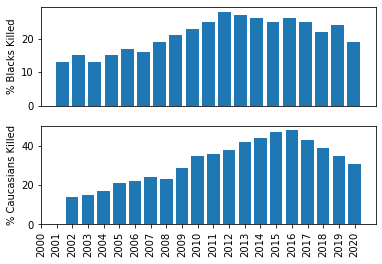

In [32]:


x2 = range(21)
plt.subplot(2,1,1)
perc_black = plt.bar(x_axis, merge_table["perc_killed_black"])
plt.ylabel('% Blacks Killed')
plt.xticks([],[])

plt.subplot(2,1,2)
perc_white = plt.bar(x_axis, merge_table["perc_killed_caucasian"])
plt.ylabel('% Caucasians Killed')
plt.xticks(x_axis, rotation = 'vertical')

plt.show()